In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-specification-dataset/laptop_price (1).csv


In [151]:
df = pd.read_csv('/kaggle/input/laptop-specification-dataset/laptop_price (1).csv',index_col = False,encoding = 'unicode_escape')
df.reset_index(drop = True,inplace = True)
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


The folowing Mextrix will be calculted here.
1. Top 10 expensive laptop
2.bottom 10 expensive laptop
3.laptop company wise number of laptop manufactor
4.top best laptop to buy in tearm of money,performance,portable


<Axes: xlabel='Product'>

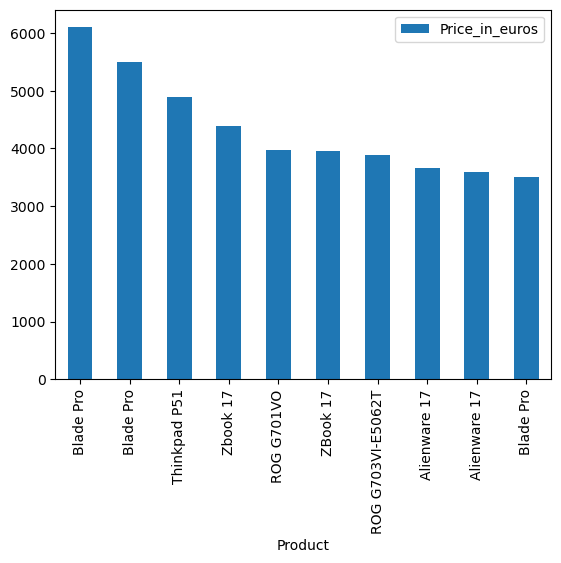

In [49]:
#top 10  expensive laptop
import matplotlib.pyplot as plt
orderbylaptopprice = df.nlargest(10,['Price_in_euros'])
TypeNameByTop10 = orderbylaptopprice[['Product','Price_in_euros']]
TypeNameByTop10.set_index(['Product'],inplace = True)
TypeNameByTop10.plot.bar()

<Axes: xlabel='Product'>

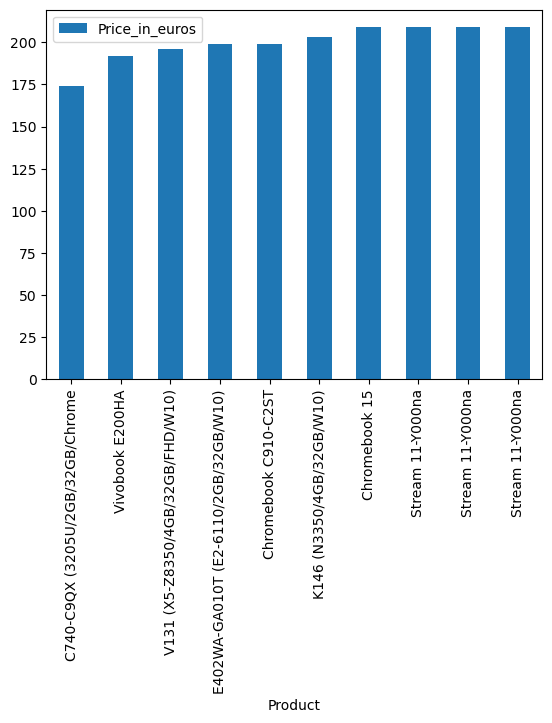

In [55]:
#Bottom 10 item Product
totalbottom  = df.nsmallest(10,['Price_in_euros'])
totalbottom10 = totalbottom[['Product','Price_in_euros']]
totalbottom10.set_index(['Product'],inplace = True)
totalbottom10.plot.bar()



<Axes: xlabel='Company'>

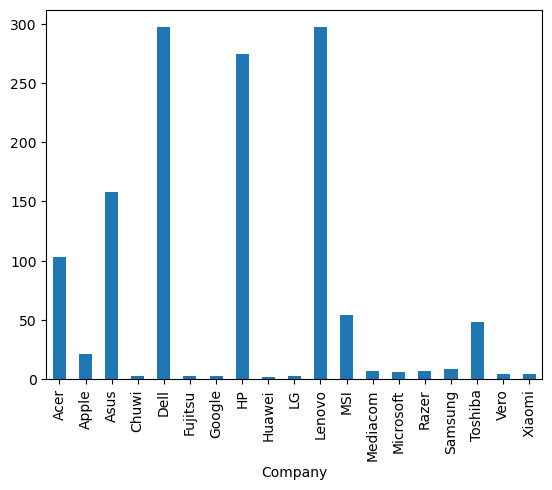

In [77]:
#Number of laptop manufactore By company
LaptopProduceByCompany = df.groupby(['Company']).Company.agg('count')
LaptopProduceByCompany.plot(kind = 'bar')



In [83]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [90]:
df[['MemoryGB','MemoryType']] = df.Memory.str.split(' ',n = 1,expand = True)
df.head(2)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,MemoryGB,MemoryType
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,128GB,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,128GB,Flash Storage


In [140]:
df[['Processertype','ProcessorCore','ProcessorModel','ProcessorSpeed']] =df.Cpu.str.split(' ', n = 3,expand = True)
df[['dummy','processorindex','Processormodelnumber']] = df.ProcessorModel.str.split('',n=2,expand = True)
df['MemorySize'] = df.MemoryGB.str.extract('(\d+)').astype(int)
df ['RamSize']  = df.Ram.str.extract('(\d+)').astype(int)

In [128]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,MemoryGB,MemoryType,Processertype,ProcessorCore,ProcessorModel,ProcessorSpeed,dummy,processorindex,Processormodelnumber,MemorySize
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,128GB,SSD,Intel,Core,i5,2.3GHz,,i,5,128
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,128GB,Flash Storage,Intel,Core,i5,1.8GHz,,i,5,128


In [150]:
#Best Laptop Under 1500 euros
display(df.loc[(df['MemorySize'] > 256) & (df['MemoryType'] == 'SSD')  & (df['RamSize'] > 8)& (df['Price_in_euros'] <  1500),['Company','Product','Price_in_euros']])

,Company,Product,Price_in_euros
8,Asus,ZenBook UX430UN,1495.00
92,HP,Probook 430,1197.00
123,HP,Probook 470,1271.00
150,Dell,Inspiron 5577,1249.26
205,Lenovo,Legion Y520-15IKBN,1398.00
219,Dell,Inspiron 5379,1279.00
299,Asus,ZenBook UX530UQ-PRO,1468.00
354,Toshiba,Tecra A50-C-21G,1403.00
591,Lenovo,IdeaPad 320-15ABR,949.00
714,Dell,Latitude 5580,1426.66
